## Churn Prediction

required table :
1. customer
2. cust_order
3. order_status
4. order_history
5. address
6. address_status
7. order_line
8. shipping_method

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"D:\DS_Final_Project\Notebook\data\RAW_CSV"

customer = pd.read_csv(f"{path}\\customer.csv")
cust_order = pd.read_csv(f"{path}\\cust_order.csv")
customer_address = pd.read_csv(f"{path}\\customer_address.csv")
address = pd.read_csv(f"{path}\\address.csv")
address_status = pd.read_csv(f"{path}\\address_status.csv")
order_history = pd.read_csv(f"{path}\\order_history.csv")
order_line = pd.read_csv(f"{path}\\order_line.csv")
order_status = pd.read_csv(f"{path}\\order_status.csv")
shipping_method = pd.read_csv(f"{path}\\shipping_method.csv")


In [131]:
tables = [
    ("customer", customer),
    ("cust_order", cust_order),
    ("customer_address", customer_address),
    ("address", address),
    ("address_status", address_status),
    ("order_history", order_history),
    ("order_line", order_line),
    ("order_status", order_status),
    ("shipping_method", shipping_method)]

for name,df in tables:
    print(f"{name} : {list(df.columns)}")
    print("-"*50)


customer : ['customer_id', 'first_name', 'last_name', 'email']
--------------------------------------------------
cust_order : ['order_id', 'order_date', 'customer_id', 'shipping_method_id', 'dest_address_id']
--------------------------------------------------
customer_address : ['customer_id', 'address_id', 'status_id']
--------------------------------------------------
address : ['address_id', 'street_number', 'street_name', 'city', 'country_id']
--------------------------------------------------
address_status : ['status_id', 'address_status']
--------------------------------------------------
order_history : ['history_id', 'order_id', 'status_id', 'status_date']
--------------------------------------------------
order_line : ['line_id', 'order_id', 'book_id', 'price']
--------------------------------------------------
order_status : ['status_id', 'status_value']
--------------------------------------------------
shipping_method : ['method_id', 'method_name', 'cost']
---------------

In [65]:
#customer & cust_order & customer_address == customer id
#cust_order & order_history & order line == order_id
#cust_order & customer_address & address == address_id
#customer_address & address_status == status_id
#order_history & order_status == status id  (Both are different)

In [132]:
customer.sample(10)

,customer_id,first_name,last_name,email
1387,1388,Salim,McCreery,smccreeryar@webmd.com
540,541,Vina,Parks,vparksf0@patch.com
933,934,Ivan,Orpyne,iorpynepx@theatlantic.com
590,591,Wain,Michel,wmichelge@samsung.com
1319,1320,Violetta,Coppledike,vcoppledike8v@blogger.com
1021,1022,Rycca,Burdess,rburdessl@geocities.com
1142,1143,Lenette,Shepton,lshepton3y@people.com.cn
681,682,Vonny,Edmondson,vedmondsonix@seesaa.net
194,195,Edward,Kenealy,ekenealy5e@mysql.com
619,620,Salomone,Rummin,srumminh7@opera.com


In [67]:
#checking for any null values
customer.isnull().sum()

customer_id    0
first_name     0
last_name      0
email          0
dtype: int64

In [68]:
#checking for duplicates
print(customer.duplicated().sum())

0


In [69]:
# Check for the shape
customer['customer_id'].shape

(2000,)

In [133]:
# Taking copy of the dataframe to retain the original df
customer_df = customer.copy()
customer_df

,customer_id,first_name,last_name,email
0,1,Ursola,Purdy,upurdy0@cdbaby.com
1,2,Ruthanne,Vatini,rvatini1@fema.gov
2,3,Reidar,Turbitt,rturbitt2@geocities.jp
3,4,Rich,Kirsz,rkirsz3@jalbum.net
4,5,Carline,Kupis,ckupis4@tamu.edu
...,...,...,...,...
1995,1996,Byron,Mayor,bmayorrn@netscape.com
1996,1997,Janean,Coatsworth,jcoatsworthro@purevolume.com
1997,1998,Georgeanna,Garman,ggarmanrp@surveymonkey.com
1998,1999,Ardeen,Caret,acaretrq@wsj.com


In [71]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  2000 non-null   int64 
 1   first_name   2000 non-null   object
 2   last_name    2000 non-null   object
 3   email        2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [134]:
# Taking copy of the dataframe to retain the original df

cust_order_df = cust_order.copy()

In [73]:
cust_order_df.shape

(7550, 5)

In [74]:
cust_order_df.isnull().sum()

order_id              0
order_date            0
customer_id           0
shipping_method_id    0
dest_address_id       0
dtype: int64

In [75]:
print(cust_order_df.duplicated().sum())

0


In [76]:
cust_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7550 entries, 0 to 7549
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            7550 non-null   int64 
 1   order_date          7550 non-null   object
 2   customer_id         7550 non-null   int64 
 3   shipping_method_id  7550 non-null   int64 
 4   dest_address_id     7550 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 295.1+ KB


In [77]:
cust_order_df.head()

,order_id,order_date,customer_id,shipping_method_id,dest_address_id
0,1,2023-08-22 16:12:12,413,2,1
1,2,2023-07-25 03:52:27,1338,1,1
2,3,2022-05-26 14:15:06,1464,3,2
3,4,2022-01-01 10:23:19,269,2,3
4,5,2024-11-29 11:35:26,1463,4,3


In [135]:
pd.set_option('display.max_column',50)

In [136]:
cust_order_df["order_date"] = pd.to_datetime(cust_order_df["order_date"])
cust_order_df['cust_order_day'] = cust_order_df['order_date'].dt.day
cust_order_df['cust_order_month'] = cust_order_df['order_date'].dt.month
cust_order_df['cust_order_year'] = cust_order_df["order_date"].dt.year
cust_order_df['order_date_formatted'] = cust_order_df["order_date"].dt.strftime('%m-%d-%Y')
cust_order_df.drop(["order_date"],axis=1,inplace=True)
cust_order_df

,order_id,customer_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted
0,1,413,2,1,22,8,2023,08-22-2023
1,2,1338,1,1,25,7,2023,07-25-2023
2,3,1464,3,2,26,5,2022,05-26-2022
3,4,269,2,3,1,1,2022,01-01-2022
4,5,1463,4,3,29,11,2024,11-29-2024
...,...,...,...,...,...,...,...,...
7545,11430,1850,4,13,26,12,2023,12-26-2023
7546,11431,673,1,14,2,4,2022,04-02-2022
7547,11432,427,2,15,22,5,2024,05-22-2024
7548,11433,506,4,15,22,8,2023,08-22-2023


In [137]:
cust_order_df.isnull().sum()

order_id                0
customer_id             0
shipping_method_id      0
dest_address_id         0
cust_order_day          0
cust_order_month        0
cust_order_year         0
order_date_formatted    0
dtype: int64

In [138]:
# Taking copy of Order line table
order_line_df = order_line.copy()


In [82]:
order_line_df.sample(5)

,line_id,order_id,book_id,price
5836,5837,2217,4470,15.32
14203,14987,7071,6521,13.66
8166,8808,6337,826,2.48
1396,1397,59,3874,14.91
11797,12534,9472,8581,15.03


In [139]:
order_line_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   line_id   15400 non-null  int64  
 1   order_id  15400 non-null  int64  
 2   book_id   15400 non-null  int64  
 3   price     15400 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 481.4 KB


In [84]:
order_line_df.isnull().sum()

line_id     0
order_id    0
book_id     0
price       0
dtype: int64

In [85]:
print(order_line_df.duplicated().sum())

0


In [86]:
order_line_df

,line_id,order_id,book_id,price
0,1,1213,6476,13.42
1,2,5308,6784,0.70
2,3,240,3857,12.55
3,4,2333,1091,12.14
4,5,4335,8258,17.79
...,...,...,...,...
15395,16424,11428,6825,0.91
15396,16425,8315,1606,13.99
15397,16426,4695,8707,17.82
15398,16427,6550,10090,10.23


In [140]:
#Merging customer table and cust_order table

customer_cust_order_df = pd.merge(customer,cust_order_df,how="left",on="customer_id")
customer_cust_order_df.sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted
1226,296,Sosanna,Hubane,shubane87@csmonitor.com,10245.0,4.0,4.0,3.0,7.0,2024.0,07-03-2024
5841,1487,Frasco,Conkay,fconkaydi@github.io,1504.0,2.0,448.0,14.0,5.0,2024.0,05-14-2024
2075,533,Stuart,Slyford,sslyfordes@ucoz.com,4781.0,1.0,209.0,23.0,4.0,2024.0,04-23-2024
4458,1130,Marline,Neiland,mneiland3l@sphinn.com,5458.0,4.0,403.0,16.0,10.0,2024.0,10-16-2024
4210,1049,Carolann,Cloke,ccloke1c@sun.com,1434.0,1.0,428.0,9.0,10.0,2023.0,10-09-2023


In [141]:
# Merging customer_cust_order and  order line df

merged_customer_df = pd.merge(customer_cust_order_df,order_line_df,how='left',on='order_id')
merged_customer_df.sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price
7368,915,Elnore,Ginty,egintype@yellowbook.com,4601.0,2.0,158.0,13.0,2.0,2023.0,02-13-2023,3526.0,3545.0,8.87
14697,1881,Francesca,Grevatt,fgrevattog@google.de,8997.0,1.0,242.0,2.0,5.0,2022.0,05-02-2022,15207.0,3230.0,2.46
10004,1275,Kissee,Bovis,kbovis7m@wix.com,10308.0,2.0,21.0,9.0,2.0,2022.0,02-09-2022,4804.0,6686.0,6.42
10207,1301,Eleanora,Clemon,eclemon8c@reverbnation.com,9081.0,3.0,266.0,21.0,11.0,2022.0,11-21-2022,4900.0,5286.0,17.99
8356,1035,Pietrek,Moen,pmoeny@nhs.uk,302.0,4.0,92.0,12.0,7.0,2023.0,07-12-2023,8392.0,402.0,2.04


In [142]:
merged_customer_df["order_date_formatted"] = pd.to_datetime(merged_customer_df["order_date_formatted"])

merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15699 entries, 0 to 15698
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           15699 non-null  int64         
 1   first_name            15699 non-null  object        
 2   last_name             15699 non-null  object        
 3   email                 15699 non-null  object        
 4   order_id              15400 non-null  float64       
 5   shipping_method_id    15400 non-null  float64       
 6   dest_address_id       15400 non-null  float64       
 7   cust_order_day        15400 non-null  float64       
 8   cust_order_month      15400 non-null  float64       
 9   cust_order_year       15400 non-null  float64       
 10  order_date_formatted  15400 non-null  datetime64[ns]
 11  line_id               15400 non-null  float64       
 12  book_id               15400 non-null  float64       
 13  price           

In [90]:
merged_customer_df.isnull().sum()

customer_id               0
first_name                0
last_name                 0
email                     0
order_id                299
shipping_method_id      299
dest_address_id         299
cust_order_day          299
cust_order_month        299
cust_order_year         299
order_date_formatted    299
line_id                 299
book_id                 299
price                   299
dtype: int64

In [143]:
#notna() returns true or false when we have Non-null(not for missing values)
merged_customer_df['has_order'] = merged_customer_df['order_id'].notna().astype(int)
merged_customer_df.sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order
4907,632,Zarah,Huerta,zhuertahj@goo.gl,1333.0,4.0,394.0,2.0,5.0,2023.0,2023-05-02,13760.0,5033.0,13.62,1
5255,670,Louisette,Brattan,lbrattanil@salon.com,6217.0,2.0,22.0,25.0,6.0,2022.0,2022-06-25,2528.0,5849.0,9.17,1
12302,1569,Christoph,Densham,cdenshamfs@geocities.jp,6934.0,1.0,238.0,4.0,6.0,2022.0,2022-06-04,5928.0,4243.0,17.99,1
10818,1377,Michal,Bensen,mbensenag@ovh.net,1377.0,1.0,408.0,7.0,2.0,2022.0,2022-02-07,9012.0,10079.0,4.08,1
7737,948,Avrit,Rockall,arockallqb@slideshare.net,7024.0,2.0,263.0,22.0,12.0,2022.0,2022-12-22,13782.0,2557.0,11.19,1


In [144]:
merged_customer_df[merged_customer_df['order_id'].isnull()].sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order
1214,151,Camille,Wethers,cwethers46@washington.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
13437,1726,Kordula,Ronisch,kronischk5@yandex.ru,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
8437,1044,Jeanie,Castelletti,jcastelletti17@amazonaws.com,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
13841,1780,Clair,Saywell,csaywellln@istockphoto.com,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0
13121,1687,Patricia,Huban,phubanj2@dyndns.org,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,0


In [145]:
merged_customer_df.isnull().sum()

customer_id               0
first_name                0
last_name                 0
email                     0
order_id                299
shipping_method_id      299
dest_address_id         299
cust_order_day          299
cust_order_month        299
cust_order_year         299
order_date_formatted    299
line_id                 299
book_id                 299
price                   299
has_order                 0
dtype: int64

In [146]:
# Fill missing order-related columns with a 0 value
merged_customer_df['order_id'] = merged_customer_df['order_id'].fillna(0).astype(int)
merged_customer_df['shipping_method_id'] = merged_customer_df['shipping_method_id'].fillna(0).astype(int)
merged_customer_df['dest_address_id'] = merged_customer_df['dest_address_id'].fillna(0).astype(int)
merged_customer_df['cust_order_day'] = merged_customer_df['cust_order_day'].fillna(0).astype(int)
merged_customer_df['cust_order_month'] = merged_customer_df['cust_order_month'].fillna(0).astype(int)
merged_customer_df['cust_order_year'] = merged_customer_df['cust_order_year'].fillna(0).astype(int)

merged_customer_df['order_date_formatted'] = merged_customer_df['order_date_formatted'].fillna('No Date')

merged_customer_df['line_id'] = merged_customer_df['line_id'].fillna(0).astype(int)
merged_customer_df['book_id'] = merged_customer_df['book_id'].fillna(0).astype(int)
merged_customer_df['price'] = merged_customer_df['price'].fillna(0).astype(float)  


In [147]:
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15699 entries, 0 to 15698
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           15699 non-null  int64  
 1   first_name            15699 non-null  object 
 2   last_name             15699 non-null  object 
 3   email                 15699 non-null  object 
 4   order_id              15699 non-null  int64  
 5   shipping_method_id    15699 non-null  int64  
 6   dest_address_id       15699 non-null  int64  
 7   cust_order_day        15699 non-null  int64  
 8   cust_order_month      15699 non-null  int64  
 9   cust_order_year       15699 non-null  int64  
 10  order_date_formatted  15699 non-null  object 
 11  line_id               15699 non-null  int64  
 12  book_id               15699 non-null  int64  
 13  price                 15699 non-null  float64
 14  has_order             15699 non-null  int64  
dtypes: float64(1), int6

In [96]:
merged_customer_df.isnull().sum()

customer_id             0
first_name              0
last_name               0
email                   0
order_id                0
shipping_method_id      0
dest_address_id         0
cust_order_day          0
cust_order_month        0
cust_order_year         0
order_date_formatted    0
line_id                 0
book_id                 0
price                   0
has_order               0
dtype: int64

In [148]:
order_history_df = order_history.copy()

In [149]:
order_history_df.duplicated().sum()

np.int64(0)

In [150]:
order_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22349 entries, 0 to 22348
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   history_id   22349 non-null  int64 
 1   order_id     22349 non-null  int64 
 2   status_id    22349 non-null  int64 
 3   status_date  22349 non-null  object
dtypes: int64(3), object(1)
memory usage: 698.5+ KB


In [100]:
order_history_df.isnull().sum()

history_id     0
order_id       0
status_id      0
status_date    0
dtype: int64

In [151]:
order_history_df.columns

Index(['history_id', 'order_id', 'status_id', 'status_date'], dtype='object')

In [152]:
#Formatting the status date

order_history_df['status_date'] = pd.to_datetime(order_history_df['status_date'])
order_history_df['order_hist_day'] = order_history_df['status_date'].dt.day
order_history_df['order_hist_month_num'] = order_history_df['status_date'].dt.month
order_history_df['order_hist_month_name'] = order_history_df['status_date'].dt.month_name()
order_history_df['order_hist_year'] = order_history_df['status_date'].dt.year
order_history_df['hist_status_date'] = order_history_df['status_date'].dt.strftime('%m-%d-%Y')
order_history_df['hist_status_date'] = pd.to_datetime(order_history_df['hist_status_date'])
order_history_df.drop("status_date",inplace=True,axis=1)
order_history_df.sample(5)

,history_id,order_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date
4137,4138,6281,1,14,10,October,2023,2023-10-14
11263,11906,1995,2,9,11,November,2024,2024-11-09
8509,9152,2004,2,28,2,February,2024,2024-02-28
7343,7344,10991,1,7,2,February,2022,2022-02-07
15158,17192,6872,3,24,9,September,2024,2024-09-24


In [103]:
order_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22349 entries, 0 to 22348
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   history_id             22349 non-null  int64         
 1   order_id               22349 non-null  int64         
 2   status_id              22349 non-null  int64         
 3   order_hist_day         22349 non-null  int32         
 4   order_hist_month_num   22349 non-null  int32         
 5   order_hist_month_name  22349 non-null  object        
 6   order_hist_year        22349 non-null  int32         
 7   hist_status_date       22349 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(3), object(1)
memory usage: 1.1+ MB


In [153]:
# Taking a copy of order line table
order_status_df = order_status.copy()
order_status_df

,status_id,status_value
0,1,Order Received
1,2,Pending Delivery
2,3,Delivery In Progress
3,4,Delivered
4,5,Cancelled
5,6,Returned


In [105]:
order_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_id     6 non-null      int64 
 1   status_value  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes


In [106]:
print(order_history_df.shape, order_status.shape)

(22349, 8) (6, 2)


In [155]:
# Merging order history df and order status df.

hist_status_df = pd.merge(order_history_df,order_status_df,how='left',on='status_id')
hist_status_df.head()


,history_id,order_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value
0,1,1,1,22,8,August,2023,2023-08-22,Order Received
1,2,2,1,25,7,July,2023,2023-07-25,Order Received
2,3,3,1,26,5,May,2022,2022-05-26,Order Received
3,4,4,1,1,1,January,2022,2022-01-01,Order Received
4,5,5,1,29,11,November,2024,2024-11-29,Order Received


In [108]:
merged_customer_df.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'order_id',
       'shipping_method_id', 'dest_address_id', 'cust_order_day',
       'cust_order_month', 'cust_order_year', 'order_date_formatted',
       'line_id', 'book_id', 'price', 'has_order'],
      dtype='object')

In [156]:
hist_status_df.columns

Index(['history_id', 'order_id', 'status_id', 'order_hist_day',
       'order_hist_month_num', 'order_hist_month_name', 'order_hist_year',
       'hist_status_date', 'status_value'],
      dtype='object')

In [157]:
merged_customer_df = pd.merge(merged_customer_df,hist_status_df,how='left',on='order_id')
merged_customer_df.sample(5)

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order,history_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value
14143,617,Valentine,Fonteyne,vfonteyneh4@livejournal.com,1470,4,440,20,2,2024,2024-02-20 00:00:00,2318,2975,0.51,1,13438.0,2.0,21.0,2.0,February,2024.0,2024-02-21,Pending Delivery
13577,593,Lorita,Ouldred,louldredgg@wordpress.org,6963,3,248,23,9,2023,2023-09-23 00:00:00,14459,9547,4.90,1,9903.0,2.0,25.0,9.0,September,2023.0,2023-09-25,Pending Delivery
39740,1753,Manuel,Gini,mginikw@narod.ru,6877,1,222,12,2,2022,2022-02-12 00:00:00,6560,10778,9.93,1,14952.0,2.0,13.0,2.0,February,2022.0,2022-02-13,Pending Delivery
36710,1607,Faydra,Charville,fcharvillegu@artisteer.com,4424,3,103,1,8,2022,2022-08-01 00:00:00,6059,3189,10.85,1,13688.0,2.0,2.0,8.0,August,2022.0,2022-08-02,Pending Delivery
18688,801,Nester,Klaessen,nklaessenm8@bloglines.com,1901,1,579,6,10,2023,2023-10-06 00:00:00,3042,7248,14.71,1,19557.0,3.0,9.0,10.0,October,2023.0,2023-10-09,Delivery In Progress


In [158]:
# Convert the 'order_date_formatted' to a different format

merged_customer_df['order_date_formatted'] = pd.to_datetime(merged_customer_df['order_date_formatted'],errors='coerce')
merged_customer_df['order_date_formatted'] = merged_customer_df['order_date_formatted'].dt.strftime('%Y-%m-%d')

# Print the result
merged_customer_df


,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order,history_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,1212.0,1.0,7.0,2.0,February,2023.0,2023-02-07,Order Received
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,12860.0,2.0,8.0,2.0,February,2023.0,2023-02-08,Pending Delivery
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,18936.0,3.0,8.0,2.0,February,2023.0,2023-02-08,Delivery In Progress
3,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,21072.0,4.0,9.0,2.0,February,2023.0,2023-02-09,Delivered
4,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,25124.0,6.0,11.0,2.0,February,2023.0,2023-02-11,Returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45910,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,9532,4,99,28,5,2022,2022-05-28,9939,3557,18.04,1,19475.0,3.0,30.0,5.0,May,2022.0,2022-05-30,Delivery In Progress
45911,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,9532,4,99,28,5,2022,2022-05-28,9939,3557,18.04,1,23532.0,4.0,1.0,6.0,June,2022.0,2022-06-01,Delivered
45912,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,10555,4,99,22,5,2024,2024-05-22,7550,1577,19.27,1,7019.0,1.0,22.0,5.0,May,2024.0,2024-05-22,Order Received
45913,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,10555,4,99,22,5,2024,2024-05-22,7550,1577,19.27,1,14753.0,2.0,23.0,5.0,May,2024.0,2024-05-23,Pending Delivery


In [112]:
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45915 entries, 0 to 45914
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            45915 non-null  int64         
 1   first_name             45915 non-null  object        
 2   last_name              45915 non-null  object        
 3   email                  45915 non-null  object        
 4   order_id               45915 non-null  int64         
 5   shipping_method_id     45915 non-null  int64         
 6   dest_address_id        45915 non-null  int64         
 7   cust_order_day         45915 non-null  int64         
 8   cust_order_month       45915 non-null  int64         
 9   cust_order_year        45915 non-null  int64         
 10  order_date_formatted   45616 non-null  object        
 11  line_id                45915 non-null  int64         
 12  book_id                45915 non-null  int64         
 13  p

In [113]:
merged_customer_df.isnull().sum()

customer_id                0
first_name                 0
last_name                  0
email                      0
order_id                   0
shipping_method_id         0
dest_address_id            0
cust_order_day             0
cust_order_month           0
cust_order_year            0
order_date_formatted     299
line_id                    0
book_id                    0
price                      0
has_order                  0
history_id               300
status_id                300
order_hist_day           300
order_hist_month_num     300
order_hist_month_name    300
order_hist_year          300
hist_status_date         300
status_value             300
dtype: int64

In [159]:
# Create a flag to indicate whether a customer has order history
merged_customer_df['has_order_history'] = merged_customer_df['history_id'].notna().astype(int)


In [160]:
# Correct way to handle missing values without inplace=True
merged_customer_df['history_id'] = merged_customer_df['history_id'].fillna(0).astype(int)
merged_customer_df['status_id'] = merged_customer_df['status_id'].fillna(0).astype(int)
merged_customer_df['order_hist_day'] = merged_customer_df['order_hist_day'].fillna(0).astype(int)
merged_customer_df['order_hist_month_num'] = merged_customer_df['order_hist_month_num'].fillna(0).astype(int)
merged_customer_df['order_hist_month_name'] = merged_customer_df['order_hist_month_name'].fillna('No History')
merged_customer_df['order_hist_year'] = merged_customer_df['order_hist_year'].fillna(0).astype(int)
merged_customer_df['hist_status_date'] = merged_customer_df['hist_status_date'].fillna('No History')
merged_customer_df['status_value'] = merged_customer_df['status_value'].fillna('No History')

# For order_date_formatted column
#merged_customer_df['order_date_formatted'] = merged_customer_df['order_date_formatted'].fillna('No Date')


In [161]:
pd.set_option('display.max_columns',50)

In [117]:
merged_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45915 entries, 0 to 45914
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            45915 non-null  int64  
 1   first_name             45915 non-null  object 
 2   last_name              45915 non-null  object 
 3   email                  45915 non-null  object 
 4   order_id               45915 non-null  int64  
 5   shipping_method_id     45915 non-null  int64  
 6   dest_address_id        45915 non-null  int64  
 7   cust_order_day         45915 non-null  int64  
 8   cust_order_month       45915 non-null  int64  
 9   cust_order_year        45915 non-null  int64  
 10  order_date_formatted   45616 non-null  object 
 11  line_id                45915 non-null  int64  
 12  book_id                45915 non-null  int64  
 13  price                  45915 non-null  float64
 14  has_order              45915 non-null  int64  
 15  hi

In [162]:
#changing to date formate as seems to have object type for dates

merged_customer_df['hist_status_date'] = pd.to_datetime(merged_customer_df['hist_status_date'],errors='coerce')
merged_customer_df['order_date_formatted'] = pd.to_datetime(merged_customer_df['order_date_formatted'],errors='coerce')
merged_customer_df

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order,history_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value,has_order_history
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,1212,1,7,2,February,2023,2023-02-07,Order Received,1
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,12860,2,8,2,February,2023,2023-02-08,Pending Delivery,1
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,18936,3,8,2,February,2023,2023-02-08,Delivery In Progress,1
3,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,21072,4,9,2,February,2023,2023-02-09,Delivered,1
4,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,25124,6,11,2,February,2023,2023-02-11,Returned,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45910,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,9532,4,99,28,5,2022,2022-05-28,9939,3557,18.04,1,19475,3,30,5,May,2022,2022-05-30,Delivery In Progress,1
45911,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,9532,4,99,28,5,2022,2022-05-28,9939,3557,18.04,1,23532,4,1,6,June,2022,2022-06-01,Delivered,1
45912,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,10555,4,99,22,5,2024,2024-05-22,7550,1577,19.27,1,7019,1,22,5,May,2024,2024-05-22,Order Received,1
45913,2000,Delora,Bigglestone,dbigglestonerr@usatoday.com,10555,4,99,22,5,2024,2024-05-22,7550,1577,19.27,1,14753,2,23,5,May,2024,2024-05-23,Pending Delivery,1


In [164]:
# Replacing null value of date with NaT

merged_customer_df['hist_status_date'] = merged_customer_df['hist_status_date'].fillna('No History')
merged_customer_df['order_date_formatted'] = merged_customer_df['order_date_formatted'].fillna('No order')

merged_customer_df['hist_status_date'] = pd.to_datetime(merged_customer_df['hist_status_date'], errors='coerce')
merged_customer_df['order_date_formatted'] = pd.to_datetime(merged_customer_df['order_date_formatted'], errors='coerce')

# Missing dates remain as NaT
merged_customer_df['hist_status_date'] = merged_customer_df['hist_status_date'].fillna(pd.NaT)
merged_customer_df['order_date_formatted'] = merged_customer_df['order_date_formatted'].fillna(pd.NaT)


In [165]:
# latest order date in this dataset seems to be in December 2021. So we can consider 2021 as a current scenario

max_order_date = merged_customer_df['order_date_formatted'].max()

churn_threshold = max_order_date - pd.DateOffset(months=6)

# FUnction to calculate churn yes or NO

def calculate_churn(order_date, churn_threshold):
    if pd.isna(order_date):  # If order date is missing
        return 1
    elif pd.notna(order_date) and order_date < churn_threshold:  # If order date is older than churn threshold
        return 1
    else:
        return 0  # If order date is recent or missing
    
merged_customer_df['churn'] = merged_customer_df['order_date_formatted'].apply(calculate_churn,churn_threshold=churn_threshold)


In [166]:
# value counts of churn column

merged_customer_df.churn.value_counts()

churn
1    38183
0     7732
Name: count, dtype: int64

In [167]:
# Save the merged file to folder to do EDA.

import os

churn_data = merged_customer_df.copy()

FOLDER_NAME = 'Merged_data'
FILE_NAME = 'Churn_data.csv'
folder_path = os.path.join(os.getcwd(),'data',FOLDER_NAME)
file_path = os.path.join(folder_path,FILE_NAME)
os.makedirs(folder_path,exist_ok=True)
churn_data.to_csv(file_path,index=False)

In [168]:
churn_data = pd.read_csv(r'D:\DS_Final_Project\Notebook\data\Merged_data\Churn_data.csv')

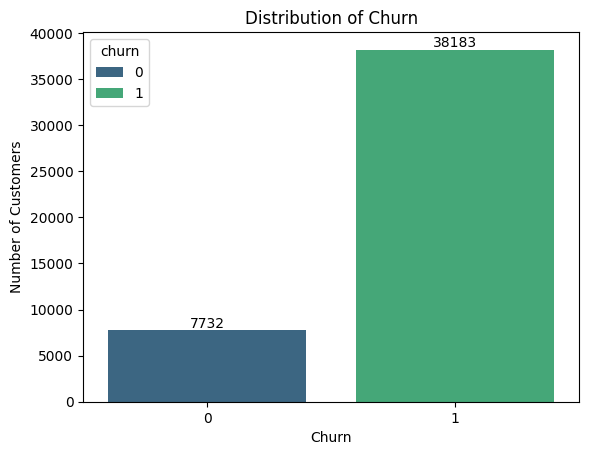

In [169]:
# Plot the distribution of churn
sns.countplot(x='churn',data=churn_data,hue=churn_data.churn, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')

churn_count = churn_data['churn'].value_counts()

for i in range(len(churn_count)):
    plt.text(i,churn_count[i],s=str(churn_count[i]),ha='center',va='bottom')

#plt.text(x=0,y=churn_data.churn,s=str(churn_data.churn))
plt.show()


**It seems that churn 'yes' have majority of data. So prediction for churn will lead to biased. SO we need to do some sampling to avoid bias situation.**

In [170]:
churn_data.isnull().sum()

customer_id                0
first_name                 0
last_name                  0
email                      0
order_id                   0
shipping_method_id         0
dest_address_id            0
cust_order_day             0
cust_order_month           0
cust_order_year            0
order_date_formatted     299
line_id                    0
book_id                    0
price                      0
has_order                  0
history_id                 0
status_id                  0
order_hist_day             0
order_hist_month_num       0
order_hist_month_name      0
order_hist_year            0
hist_status_date         300
status_value               0
has_order_history          0
churn                      0
dtype: int64

In [172]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45915 entries, 0 to 45914
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            45915 non-null  int64  
 1   first_name             45915 non-null  object 
 2   last_name              45915 non-null  object 
 3   email                  45915 non-null  object 
 4   order_id               45915 non-null  int64  
 5   shipping_method_id     45915 non-null  int64  
 6   dest_address_id        45915 non-null  int64  
 7   cust_order_day         45915 non-null  int64  
 8   cust_order_month       45915 non-null  int64  
 9   cust_order_year        45915 non-null  int64  
 10  order_date_formatted   45616 non-null  object 
 11  line_id                45915 non-null  int64  
 12  book_id                45915 non-null  int64  
 13  price                  45915 non-null  float64
 14  has_order              45915 non-null  int64  
 15  hi

In [178]:
# Replacing null value of date with No order and No history

churn_data['hist_status_date'] = churn_data['hist_status_date'].fillna('No History')
churn_data['order_date_formatted'] = churn_data['order_date_formatted'].fillna('No order')

In [179]:
churn_data.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'order_id',
       'shipping_method_id', 'dest_address_id', 'cust_order_day',
       'cust_order_month', 'cust_order_year', 'order_date_formatted',
       'line_id', 'book_id', 'price', 'has_order', 'history_id', 'status_id',
       'order_hist_day', 'order_hist_month_num', 'order_hist_month_name',
       'order_hist_year', 'hist_status_date', 'status_value',
       'has_order_history', 'churn'],
      dtype='object')

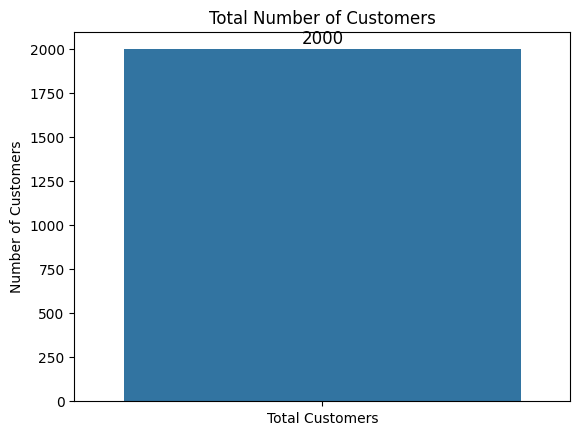

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total number of unique customers
Total_cust = churn_data['customer_id'].nunique()

# Create a single-element DataFrame for plotting
sns.barplot(x=['Total Customers'], y=[Total_cust])

# Add labels and title
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers')

# Add text annotation on top of the bar
plt.text(x=0, y=Total_cust + 10, s=str(Total_cust), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()


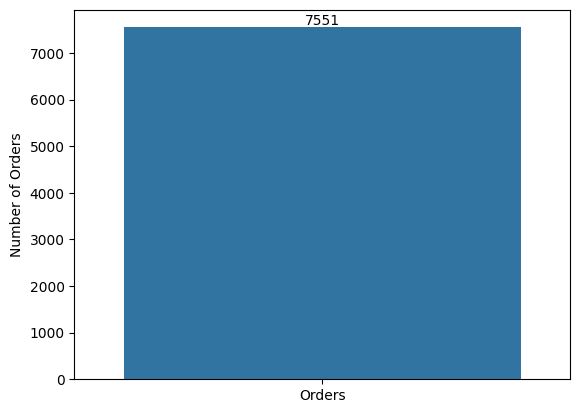

In [218]:
# total number of order
order_num = churn_data['order_id'].nunique()

sns.barplot(x=['Orders'], y=order_num)
plt.ylabel("Number of Orders")
plt.text(x=0,y=order_num,s=str(order_num),ha = 'center',va='bottom')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22096\3992339167.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index.astype(str), y=top_10.values,palette='viridis')


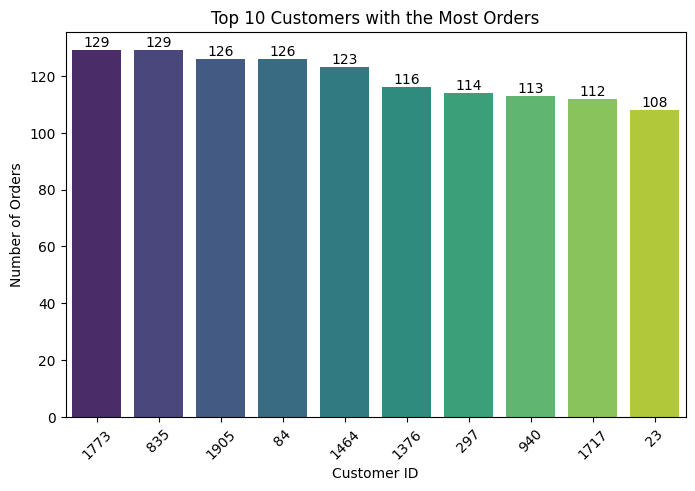

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by customer_id and count the number of orders for each customer
grouped = churn_data.groupby('customer_id')['order_id'].agg('count')

# Sort the customers by number of orders in descending order and get the top 10
top_10 = grouped.sort_values(ascending=False).head(10)

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plotting the top 10 customers with highest number of orders
sns.barplot(x=top_10.index.astype(str), y=top_10.values,palette='viridis')

# Add labels and title
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top 10 Customers with the Most Orders')

# Adding the numerical values on top of the bars
for i in range(len(top_10)):
    plt.text(i, top_10.values[i] + 0.1,  # Positioning the text slightly above the bar
             s= str(top_10.values[i]),       # The text is the order count value
             ha='center', va='bottom',    # Text alignment
             fontsize=10, color='black')  # Font size and color

# Show the plot
plt.xticks(rotation=45)  # Rotate customer IDs if necessary to avoid overlap
plt.show()


**Observation : CUstomer ID 1773 has placed higher orders**

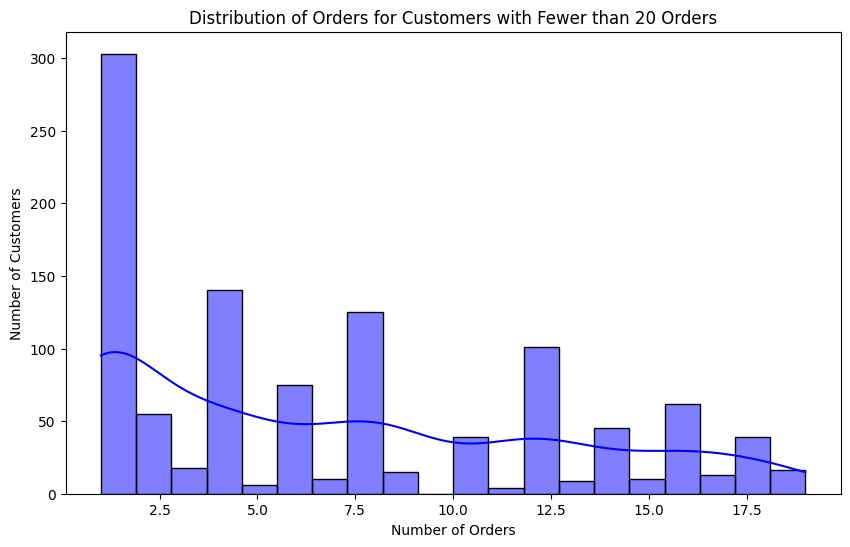

In [183]:
# Group by customer_id and count the number of orders per customer
grouped = churn_data.groupby('customer_id')['order_id'].agg('count')

# Filter customers with fewer than 20 orders
min_order = grouped[grouped < 20]

# Plot the distribution of orders for customers with fewer than 20 orders
plt.figure(figsize=(10, 6))
sns.histplot(min_order, kde=True, color='blue', bins=20)

# Add labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Orders for Customers with Fewer than 20 Orders')

# Show the plot
plt.show()

**We see from the above that more than 300+ customer has orders lesser than 2.**

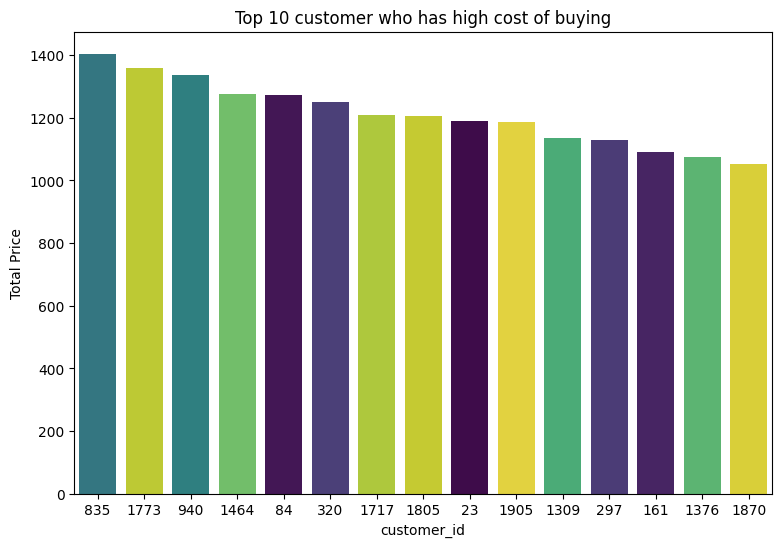

In [184]:
# Top 10 customers with high buying price

top_10_buying = churn_data.groupby('customer_id')['price'].agg('sum').sort_values(ascending=False).head(15)

plt.figure(figsize=(9,6))
sns.barplot(x=top_10_buying.index.astype(str),y=top_10_buying.values,hue=top_10_buying.index,palette='viridis',legend=False)
plt.title("Top 10 customer who has high cost of buying")
plt.xlabel("customer_id")
plt.ylabel("Total Price")
plt.show()


**Customer ID 835 has the hight highest overall price amount**

In [222]:
churn_data.head()

,customer_id,first_name,last_name,email,order_id,shipping_method_id,dest_address_id,cust_order_day,cust_order_month,cust_order_year,order_date_formatted,line_id,book_id,price,has_order,history_id,status_id,order_hist_day,order_hist_month_num,order_hist_month_name,order_hist_year,hist_status_date,status_value,has_order_history
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,1212,1,7,2,February,2023,2023-02-07,Order Received,1
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,12860,2,8,2,February,2023,2023-02-08,Pending Delivery,1
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,18936,3,8,2,February,2023,2023-02-08,Delivery In Progress,1
3,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,21072,4,9,2,February,2023,2023-02-09,Delivered,1
4,1,Ursola,Purdy,upurdy0@cdbaby.com,1213,4,359,7,2,2023,2023-02-07,1,6476,13.42,1,25124,6,11,2,February,2023,2023-02-11,Returned,1


In [185]:
churn_data.nunique()

customer_id               2000
first_name                1787
last_name                 1957
email                     2000
order_id                  7551
shipping_method_id           5
dest_address_id            727
cust_order_day              32
cust_order_month            13
cust_order_year              5
order_date_formatted      1097
line_id                  15401
book_id                   8403
price                     2000
has_order                    2
history_id               22350
status_id                    7
order_hist_day              32
order_hist_month_num        13
order_hist_month_name       13
order_hist_year              5
hist_status_date          1097
status_value                 7
has_order_history            2
churn                        2
dtype: int64

In [208]:
# Numerical columns
numerical_columns = [
    'customer_id', 'order_id', 'shipping_method_id', 'price', 'has_order', 
    'history_id', 'status_id','book_id','dest_address_id', 'line_id', 'book_id']

date_numeric_col = [
    'cust_order_day','cust_order_month', 'cust_order_year',
    'order_hist_day', 'order_hist_month_num', 'order_hist_year','order_hist_month_name']

# Categorical columns
categorical_columns = [
    'order_hist_month_name', 'status_value', 'has_order_history','order_hist_year','churn'
]

date = ['hist_status_date','hist_status_date']

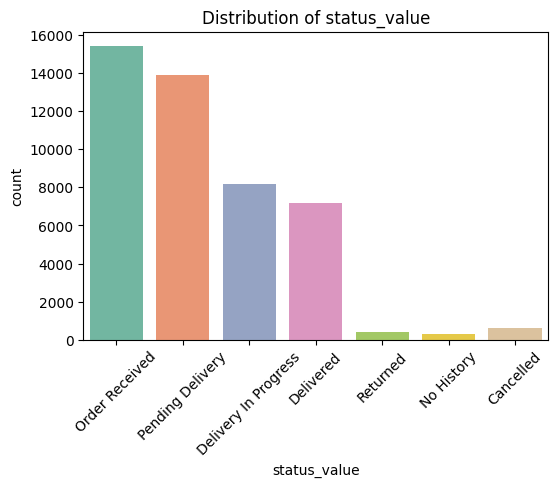

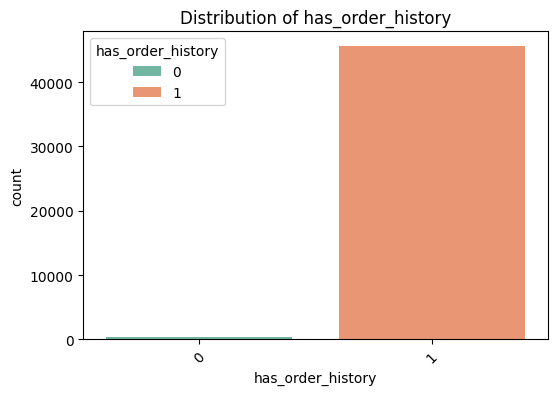

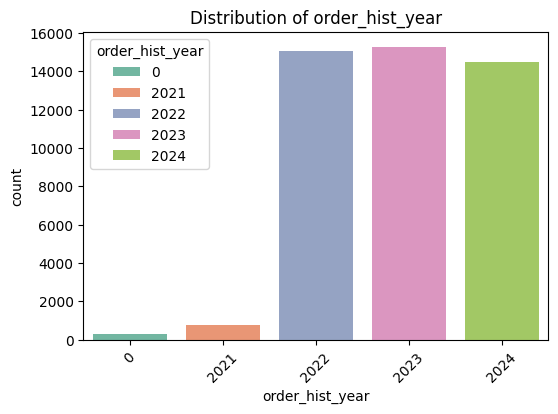

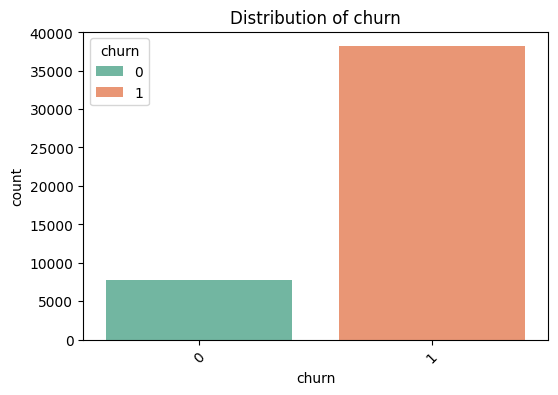

In [207]:
# Categorical column analysis
categorical_columns = ['status_value', 'has_order_history','order_hist_year', 'churn']

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col,data=churn_data,hue=col, palette="Set2")
    plt.xticks(rotation=45)  # Rotate customer IDs if necessary to avoid overlap
    plt.title(f"Distribution of {col}")
    plt.show()


**Observation :
1. 2023 has the highest oder received.
2. Order return, cancelled has less percentage.**

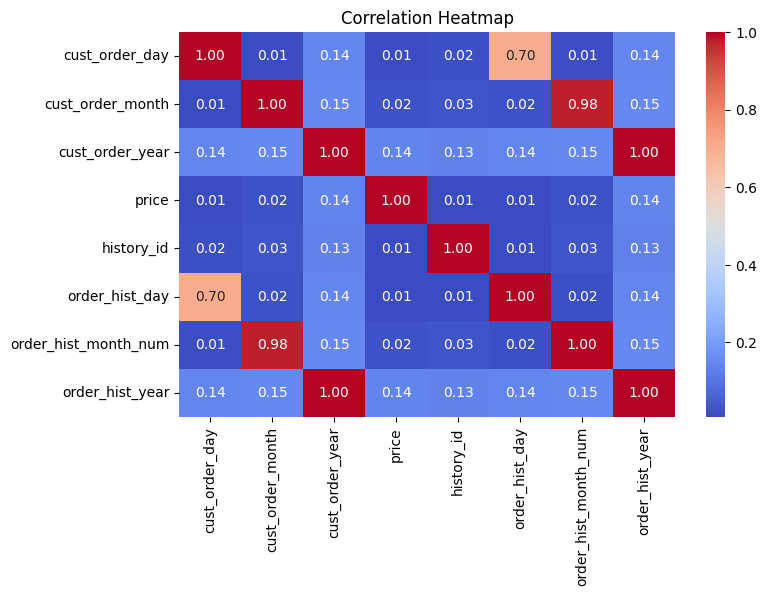

In [230]:
corr_col = ['cust_order_day', 'cust_order_month', 'cust_order_year', 'price','history_id', 'order_hist_day', 'order_hist_month_num',
                     'order_hist_year']

correlation = churn_data[corr_col].corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [237]:
import pandas as pd

# Convert 'order_date_formatted' to datetime if not already done
churn_data['order_date_formatted'] = pd.to_datetime(churn_data['order_date_formatted'], errors='coerce')

# Calculate days since the last order
churn_data['days_since_last_order'] = (churn_data['order_date_formatted'].max() - churn_data['order_date_formatted']).dt.days

# Display the updated DataFrame
churn_data[['order_date_formatted', 'days_since_last_order']].sample(10)


,order_date_formatted,days_since_last_order
34265,2023-12-01,376.0
18617,2022-08-13,851.0
30606,2023-12-01,376.0
35280,2024-03-04,282.0
1191,2023-11-13,394.0
42440,2023-04-20,601.0
44101,2022-04-06,980.0
4861,2022-08-02,862.0
41642,2024-03-23,263.0
22170,2023-09-21,447.0


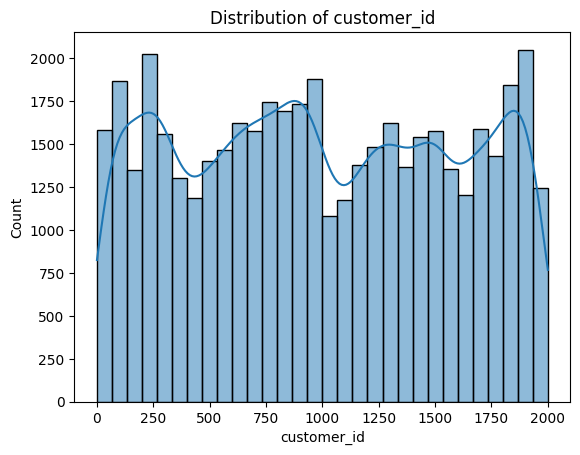

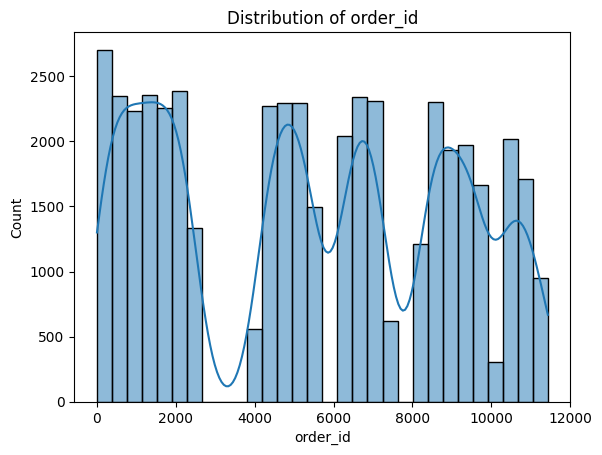

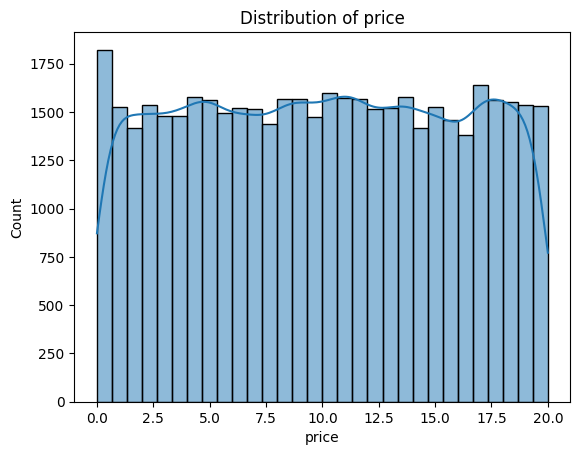

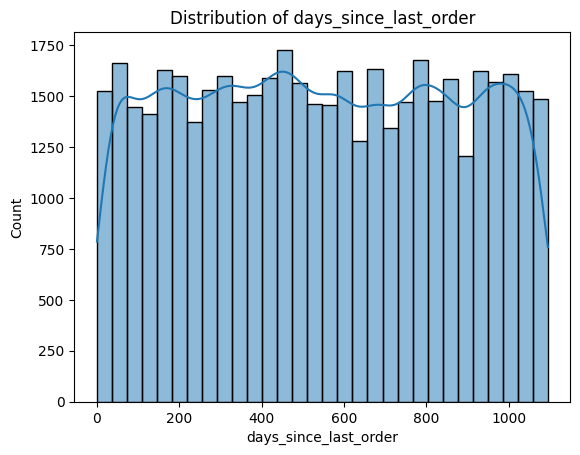

In [241]:
# Analysis for Numeric columns

numerical_columns = [
    'customer_id', 'order_id', 'price','days_since_last_order']

for col in numerical_columns:
    sns.histplot(x=churn_data[col], kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()